## Python Basic

In [1]:
a = 3
b = 2
a + b

5

## GET

In [4]:
import requests
res = requests.get('https://www.fetnet.net/estore/phone')
res

<Response [200]>

In [6]:
#res.text

In [7]:
dic = {'a': 100, 'b':200, 'c':300}
dic['b']

200

## POST

In [8]:
import requests
url = 'https://www.fetnet.net/estore/phone'
payload = {
'keyword4Handset': 'iphone', 
'pageNo4Whole': '1',
'pageNo4Handset': '1',
'pageNo4Tablet': '1',
'pageNo4Accessory': '1',
'tabType': 'searchTab2',
'changeTab': 'handsetMain',
'keywordWebTrendFlag': 'Y'    
}


res = requests.post(url, data = payload)
res


<Response [200]>

In [17]:
type(res)

requests.models.Response

In [10]:
#res.text

## BeautifulSoup

In [11]:
a = [1,2,3,4,5]
sum(a)

15

In [12]:
sum = 3
sum(a)

TypeError: 'int' object is not callable

In [13]:
from bs4 import BeautifulSoup

import bs4
bs4.BeautifulSoup

bs4.BeautifulSoup

In [14]:
html_sample = '''
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>
'''
soup  =  BeautifulSoup(html_sample, 'lxml')

In [16]:
type(soup)

bs4.BeautifulSoup

In [15]:
soup.text

'\n\nHello World\nThis is link1\nThis is link2\n\n\n'

In [18]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [19]:
soup.select_one('h1').text

'Hello World'

In [20]:
soup.select('h1')

[<h1 id="title">Hello World</h1>]

In [21]:
soup.select('h1')[0].text

'Hello World'

In [22]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [23]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [25]:
for link in soup.select('a'):
    print(link.text)

This is link1
This is link2


In [27]:
# id => #
soup.select_one('#title')

<h1 id="title">Hello World</h1>

In [28]:
# class = > .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [29]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [34]:
for link in soup.select('a.link'):
    #print(link)
    #print(link.text)
    print(link.get('href'))

#
# link2


## 抓取手機資訊

In [35]:
import requests
res = requests.get('https://www.fetnet.net/estore/phone')
res

<Response [200]>

In [37]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [54]:
a = '         1           2            3'
b = a.split()
'$'.join(b)

'1$2$3'

In [58]:
# class = itemLink
#soup.select('.itemLink')

items = []
for item in soup.select('#itemList01 a.itemLink'):
    #print(item)
    headings = item.select_one('h2').text
    desc     = item.select_one('.des').text
    #print(''.join(item.select_one('.price').text.split()) )
    price    = item.select_one('.price').text.split()[1] 
    items.append({'headings':headings, 'desc':desc, 'price': price})
    #print(headings, desc, price)

In [60]:
import pandas
phones = pandas.DataFrame(items)
phones

,desc,headings,price
0,4.7 吋對角線 LED 背光寬..,Apple iPhone 6 32GB 2018版,0
1,4G ＋ 3G 雙卡雙待,SONY Xperia XA2 Plus,0
2,4G ＋ 4G 雙卡雙待,小米 Max 3,0
3,4G ＋ 3G 雙卡雙待,OPPO AX5,0
4,4G ＋ 4G 雙卡雙待,Huawei nova 3,0
5,4G ＋ 4G 雙卡雙待,Sugar P1,0
6,"雙卡雙待4G+4G,八核心處..",Samsung Galaxy Note 9 128GB,2990
7,6.4吋曲面全景螢幕 2340*..,OPPO Find X,990
8,"5.5 吋 1,920 x 1,080pixels LE..",Apple iPhone 6S Plus 2018 128G..,0
9,2.4 吋 320 x 240pixels 解析..,Nokia 8110 4G,0


In [61]:
phones.to_excel('fetnetphones.xlsx')

## 換頁

In [2]:
for p in range(1,7):
    print(p)

1
2
3
4
5
6


In [13]:
a = [1,2,3]
b = [4,5,6]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [9]:
from bs4 import BeautifulSoup
def parseItems(res):
    items = []
    soup = BeautifulSoup(res.text, 'lxml')
    for item in soup.select('#itemList01 a.itemLink'):
        headings = item.select_one('h2').text
        desc     = item.select_one('.des').text
        price    = item.select_one('.price').text.split()[1] 
        items.append({'headings':headings, 'desc':desc, 'price': price})
    return items

In [10]:
import requests
url     = 'https://www.fetnet.net/estore/phone/' 
payload = {
 'pageNo': 2   
}
products = []
for p in range(1,7):
    payload['pageNo'] = p
    #print(payload)
    res = requests.post(url, data = payload)
    products.extend(parseItems(res))
    print(p)

1
2
3
4
5
6


In [11]:
import pandas
phones = pandas.DataFrame(products)

In [12]:
phones

,desc,headings,price
0,4.7 吋對角線 LED 背光寬..,Apple iPhone 6 32GB 2018版,0
1,4G ＋ 3G 雙卡雙待,SONY Xperia XA2 Plus,0
2,4G ＋ 4G 雙卡雙待,小米 Max 3,0
3,4G ＋ 3G 雙卡雙待,OPPO AX5,0
4,4G ＋ 4G 雙卡雙待,Huawei nova 3,0
5,4G ＋ 4G 雙卡雙待,Sugar P1,0
6,"雙卡雙待4G+4G,八核心處..",Samsung Galaxy Note 9 128GB,2990
7,6.4吋曲面全景螢幕 2340*..,OPPO Find X,990
8,"5.5 吋 1,920 x 1,080pixels LE..",Apple iPhone 6S Plus 2018 128G..,0
9,2.4 吋 320 x 240pixels 解析..,Nokia 8110 4G,0


## 抓取商品細節頁面

In [72]:
import requests
res = requests.post('https://www.fetnet.net/estore/phone/apple-iphone-6-32gb')

In [16]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [18]:
soup.select_one('.heading').text

'Apple iPhone 6 32GB 2018版'

In [23]:
for item in soup.select('.radioBox'):
    print(item)
    #print(item.select_one('.title'))
    #print(item.select_one('.price'))

<div class="radioBox first active" name="shoppingRadio" onclick="shoppingDetail('NH'); fet.ev('es-ga');" value="NH">
<div class="title">
<span class="radio" fetkey="es-ga"></span>
	                                                   新辦門號
	                                               </div>
<div class="content">
<div class="price">
<span id="gaLowestPrice_label"></span>
</div>
</div>
</div>
<div class="radioBox" name="shoppingRadio" onclick="shoppingDetail('PH'); fet.ev('es-np');" value="PH">
<div class="title">
<span class="radio" fetkey="es-np"></span>
	                                                   門號可攜
	                                               </div>
<div class="content">
<div class="price">
<span id="gaNPLowestPrice_label"></span>
</div>
</div>
</div>
<div class="radioBox" name="shoppingRadio" onclick="shoppingDetail('LH'); fet.ev('es-ly');" value="LH">
<div class="title">
<span class="radio" fetkey="es-ly"></span>
	                                                   我要續約

## 正規表達法

In [24]:
a = '0912345678'
a == '0912345678'

True

In [25]:
import re
s = '3'
re.search('3', s)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [26]:
re.search('5', s)

In [27]:
# [0123456789] => 0 or 1 or 2 ... or 9
re.search('[0123456789]', s)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [28]:
# [0123456789] => [0-9]
re.search('[0-9]', s)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [29]:
# [0-9] -> \d
re.search('\d', s)

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [30]:
s = 'w'
re.search('[abcdefghijklmnopqrstuvwzyz]', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [31]:
re.search('[a-z]', s)

<_sre.SRE_Match object; span=(0, 1), match='w'>

In [32]:
s = 'W'
re.search('[a-zA-Z]', s)

<_sre.SRE_Match object; span=(0, 1), match='W'>

In [33]:
re.search('[a-zA-Z0-9]', s)

<_sre.SRE_Match object; span=(0, 1), match='W'>

In [34]:
# \w => [a-zA-Z0-9]
re.search('\w', s)

<_sre.SRE_Match object; span=(0, 1), match='W'>

In [35]:
s = '19'
re.search('\d\d', s)

<_sre.SRE_Match object; span=(0, 2), match='19'>

In [36]:
# {m} => match m pattern
s = '19'
re.search('\d{2}', s)

<_sre.SRE_Match object; span=(0, 2), match='19'>

In [37]:
# {m, n } => match at least m pattern, at most n pattern
s = '19'
re.search('\d{1,3}', s)

<_sre.SRE_Match object; span=(0, 2), match='19'>

In [38]:
s = '19'
re.search('\d{1,}', s)

<_sre.SRE_Match object; span=(0, 2), match='19'>

In [39]:
# + => {1,}
re.search('\d+', s)

<_sre.SRE_Match object; span=(0, 2), match='19'>

In [40]:
# * => {0,}
re.search('\d*', s)

<_sre.SRE_Match object; span=(0, 2), match='19'>

In [44]:
phones = ['0912345678', '0912-345-678','0912-345678','09812038148278475897493472934923']
for p in phones:
    #m = re.search('09\d{8}', p)
    #m = re.search('09\d{2}-{0,1}\d{3}-{0,1}\d{3}', p)
    # ? => {0,1}
    #m = re.search('09\d{2}-?\d{3}-?\d{3}', p)
    # ^ match begin, $ match end
    m = re.search('^09\d{2}-?\d{3}-?\d{3}$', p)
    print(m)

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>
None


In [47]:
# () => group 
m = re.search("'erpPrice':'([\d,]+)'",res.text)

In [48]:
m.group(1)

'13500'

In [49]:
m = re.search("'discPrice': '([\d,]+)'", res.text)
m.group(1)

'11475'

In [73]:
import re
def getPriceInfo(doc):
    ret = {}
    m = re.search("'discPrice': '([\d,]+)'", doc)
    ret['discPrice'] = m.group(1)
    
    m = re.search("'erpPrice' ?:'([\d,]+)'",doc)
    ret['erpPrice']  = m.group(1)
    
    m = re.search("'gaPrice' ?:'([\d,]+)'",doc)
    ret['gaPrice']  = m.group(1) 
    
    m = re.search("'lyPrice' ?:'([\d,]+)'",doc)
    ret['lyPrice']  = m.group(1) 

    m = re.search("'npPrice' ?:'([\d,]+)'",doc)
    ret['npPrice']  = m.group(1)

    m = re.search("'inventory' ?:'([\d,]+)'",doc)
    ret['inventory']  = m.group(1) 
    
    m = re.search("var prodId = '(\w+)'", doc)
    ret['prodId'] = m.group(1)
    
    m = re.search("'fetNo': '(\d+)'", doc)
    ret['fetNo'] = m.group(1)
    return ret

    

In [74]:
info = getPriceInfo(res.text)
info

{'discPrice': '11475',
 'erpPrice': '13500',
 'fetNo': '177200352',
 'gaPrice': '0',
 'inventory': '21',
 'lyPrice': '0',
 'npPrice': '0',
 'prodId': 'ff808081616749de016173da3ed426dc'}

In [76]:
res2 = requests.get('https://www.fetnet.net/estore/shopping/common.do?cmd=queryPromotionsFromDetail&orderType=NH&entryPoint=HANDSET&productId={}&fetNo={}&promoType=&promotion=&installment=&productPrice=&totalPrice='.format(info['prodId'], info['fetNo']))

In [107]:
soup2 = BeautifulSoup(res2.text, 'lxml')

plans = [] 
for thumbnail in soup2.select('.thumbnail'):
    projectdic = {}
    heading = thumbnail.select_one('h4.heading').contents
    title = heading[1].text
    desc = heading[3].strip()
    #print(title, desc)
    for plan in thumbnail.select('.planList'):
        plandic = {}
        for item in plan.select('.list-item'):
            if item.select_one('.list-title').text.strip() in ['語音及上網資費', '商品價', '專案價']:
                plantitle = item.select_one('.list-title').text.strip() 
                planprice = ' '.join(item.select_one('.list-price').text.strip().split())
                plans.append({'title':title, 'desc':desc, 'plantitle':plantitle, 'planprice': planprice})
    

In [109]:
import pandas
plandf = pandas.DataFrame(plans)
plandf

,desc,planprice,plantitle,title
0,月付398，合約期間享網內語音免費，網外送20分鐘不含市話,$399,語音及上網資費,[網路限定]前3個月上網吃到飽
1,月付398，合約期間享網內語音免費，網外送20分鐘不含市話,$9500,商品價,[網路限定]前3個月上網吃到飽
2,月付398，合約期間享網內語音免費，網外送20分鐘不含市話,$9500 $791x12期,專案價,[網路限定]前3個月上網吃到飽
3,月付1399,$1399,語音及上網資費,上網吃到飽
4,月付1399,$0,商品價,上網吃到飽
5,月付1399,$0,專案價,上網吃到飽
6,月付1399,$1399,語音及上網資費,上網吃到飽
7,月付1399,$0,商品價,上網吃到飽
8,月付1399,$0,專案價,上網吃到飽
9,前半年上網吃到飽月付388內含5GB再送網內外各30分市話40分,$399,語音及上網資費,須持有效學生證或教職識別證


## 完整爬蟲範例

### 引用套件

In [ ]:
import requests
import re
from bs4 import BeautifulSoup

### 取得價格資料

In [132]:
def getPriceInfo(doc):
    ret = {}
    m = re.search("'discPrice': '([\d,]+)'", doc)
    if m:
        ret['discPrice'] = m.group(1)
    
    m = re.search("'erpPrice' ?:'([\d,]+)'",doc)
    if m:
        ret['erpPrice']  = m.group(1)
    
    m = re.search("'gaPrice' ?:'([\d,]+)'",doc)
    if m:
        ret['gaPrice']  = m.group(1) 
    
    m = re.search("'lyPrice' ?:'([\d,]+)'",doc)
    if m:
        ret['lyPrice']  = m.group(1) 

    m = re.search("'npPrice' ?:'([\d,]+)'",doc)
    if m:
        ret['npPrice']  = m.group(1)

    m = re.search("'inventory' ?:'([\d,]+)'",doc)
    if m:
        ret['inventory']  = m.group(1) 
    
    m = re.search("var prodId = '(\w+)'", doc)
    if m:
        ret['prodId'] = m.group(1)
    
    m = re.search("'fetNo': '(\d+)'", doc)
    if m:
        ret['fetNo'] = m.group(1)
    return ret

### 抓取商品價格資訊

In [133]:
def parseDetail(url):
    ret = {}
    res = requests.post(url)
    soup = BeautifulSoup(res.text, 'lxml')
    ret['title'] = soup.select_one('.heading').text
    ret.update(getPriceInfo(res.text))
    return ret

url = 'https://www.fetnet.net/estore/phone/apple-iphone-6-32gb'
parseDetail(url)

{'discPrice': '11475',
 'erpPrice': '13500',
 'fetNo': '177200352',
 'gaPrice': '0',
 'inventory': '21',
 'lyPrice': '0',
 'npPrice': '0',
 'prodId': 'ff808081616749de016173da3ed426dc',
 'title': 'Apple iPhone 6 32GB 2018版'}

### 解析清單頁面 

In [137]:
phoneurl = 'https://www.fetnet.net/estore/phone/'

def parseItems(res):
    ret = []
    soup = BeautifulSoup(res.text, 'lxml')
    for item in soup.select('#itemList01 a.itemLink'):
        href = item.get('onclick')
        m = re.search("handsetDetail\('(.+)'\)",href)
        link = phoneurl + m.group(1)
        #print(link)
        try:
            ret.append(parseDetail(link))
        except:
            print(link)
    return ret

In [138]:
import requests
url     = 'https://www.fetnet.net/estore/phone/' 
payload = {
 'pageNo': 2   
}
products = []
for p in range(1,7):
    payload['pageNo'] = p
    res = requests.post(url, data = payload)
    products.extend(parseItems(res))
    print(p)

1
2
3
4
5
6


In [140]:
import pandas
productdf = pandas.DataFrame(products)

In [142]:
productdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
discPrice    18 non-null object
erpPrice     67 non-null object
fetNo        67 non-null object
gaPrice      67 non-null object
inventory    67 non-null object
lyPrice      67 non-null object
npPrice      67 non-null object
prodId       67 non-null object
title        67 non-null object
dtypes: object(9)
memory usage: 4.8+ KB


In [146]:
productdf['npPrice'] = productdf['npPrice'].astype(int)

productdf['lyPrice'] = productdf['lyPrice'].astype(int)
productdf['inventory'] = productdf['inventory'].astype(int)
productdf['gaPrice'] = productdf['gaPrice'].astype(int)
productdf['discPrice'] = productdf['discPrice'].astype(float)
productdf['erpPrice'] = productdf['erpPrice'].astype(int)

In [151]:
#productdf.sort_values('inventory', ascending=False)
productdf.sort_values('erpPrice', ascending=False).head()

,discPrice,erpPrice,fetNo,gaPrice,inventory,lyPrice,npPrice,prodId,title
59,NaN,41500,177200315,7400,16,2400,7400,ff8080815f52399a015f6c543bf43e53,Apple iPhone X 256GB
60,NaN,35900,177200312,1800,24,0,1800,ff8080815f52399a015f6c25f3763c9d,Apple iPhone X 64GB
32,31395.0,34500,177200358,400,4,0,400,ff8080815e7942ed015e995955f043a4,Apple iPhone 8 Plus 256GB
46,NaN,31000,181002091,19000,5,19000,19000,ff80808161ffa93f016205420d9422dc,Apple iPhone X 256GB福利品
6,NaN,30900,171800576,3990,11,2990,3990,ff808081651089270165310648533d94,Samsung Galaxy Note 9 128GB


In [153]:
productdf['discount'] = productdf['erpPrice'] - productdf['discPrice']

In [158]:
productdf.sort_values('discount', ascending=False).head()

,discPrice,erpPrice,fetNo,gaPrice,inventory,lyPrice,npPrice,prodId,title,discount
63,20420.0,25900,171800436,0,3,0,0,ff8080815b8fa546015b8fee29f70178,Samsung Galaxy S8+,5480.0
51,26610.0,29900,171800512,4990,9,990,990,ff808081616749de0161d1294be372bd,Samsung Galaxy S9+ 128GB,3290.0
32,31395.0,34500,177200358,400,4,0,400,ff8080815e7942ed015e995955f043a4,Apple iPhone 8 Plus 256GB,3105.0
64,25290.0,28100,177200173,0,26,0,0,ff80808156fb906601572871eb091087,Apple iPhone 7 Plus 128GB,2810.0
33,28119.0,30900,177200303,0,19,0,0,ff8080815e7942ed015e994bc53a42d3,Apple iPhone 8 256GB,2781.0


In [157]:
productdf['erpPrice'].mean()

15401.716417910447

In [162]:
productdf['brand'] = productdf['title'].map(lambda e : e.split()[0].strip()) 

In [164]:
productdf['brand'].value_counts()

Apple         16
Samsung       12
Asus           6
Nokia          6
Huawei         5
OPPO           5
SONY           4
MI             3
HTC            3
小米             2
FarEastone     2
Sugar          1
Koobee         1
iTree          1
Name: brand, dtype: int64

In [167]:
# select brand, avg(erpPrice) from productdf group by brand
productdf.groupby('brand')['erpPrice'].mean().sort_values(ascending=False)

brand
Apple         26743.750000
Samsung       17502.500000
Huawei        15936.000000
SONY          15490.000000
OPPO          14390.000000
小米            12499.000000
HTC           12460.000000
Asus           8156.666667
Nokia          6356.666667
Koobee         4990.000000
MI             4832.333333
Sugar          4490.000000
FarEastone     2340.000000
iTree          2280.000000
Name: erpPrice, dtype: float64

In [169]:
productdf.to_excel('fetnetphone.xlsx')

## 資料庫

In [170]:
import sqlite3 as lite
con = lite.connect('ec.sqlite')
cur = con.cursor()
cur.execute('SELECT SQLITE_VERSION()')
data = cur.fetchone()
print(data)
con.close()

('3.19.3',)


In [171]:
import sqlite3 as lite
with lite.connect('ec.sqlite') as con:
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')
    data = cur.fetchone()
    print(data)

('3.19.3',)


In [188]:
import sqlite3 as lite
import pandas
employee = [{'name':'Mary' , 'gender': 'F'},{'name':'John', 'age':33 , 'gender': 'M'}]
df = pandas.DataFrame(employee)
df

,age,gender,name
0,NaN,F,Mary
1,33.0,M,John


In [173]:
with lite.connect('test.sqlite') as con:
    df.to_sql('employee', con = con)

In [174]:
with lite.connect('test.sqlite') as con:
    df2 = pandas.read_sql_query('select * from employee', con = con)

In [175]:
df2

,index,age,gender,name
0,0,23,F,Mary
1,1,33,M,John


In [176]:
with lite.connect('ec.sqlite') as con:
    productdf.to_sql('phones', con = con)

In [183]:
with lite.connect('ec.sqlite') as con:
    #df2 = pandas.read_sql_query('select title, erpPrice from phones order by erpPrice desc limit 3', con = con)
    df2 = pandas.read_sql_query('select brand, avg(erpPrice) as mean_price from phones group by brand order by avg(erpPrice) desc limit 10', con = con)

Populating the interactive namespace from numpy and matplotlib


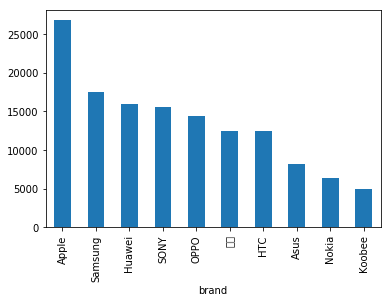

In [187]:
%pylab inline
df2 = df2.set_index('brand')
df2['mean_price'].plot(kind = 'bar')

## 抓取圖片

In [189]:
imgurl = 'https://www.fetnet.net/estore/upload_img/product/170200228/large/1.jpg'
res = requests.get(imgurl)
with open('1.jpg', 'wb') as f:
    f.write(res.content)


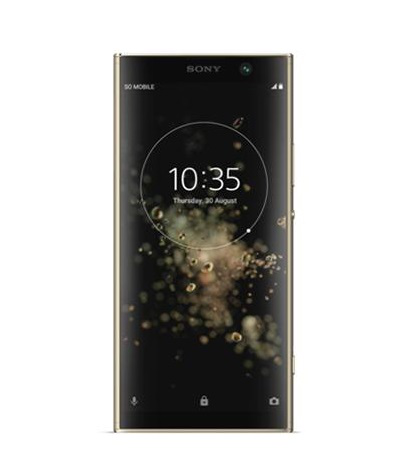

In [190]:
from PIL import Image
Image.open('1.jpg')

## 爬蟲應用

### 加上user-agent 抓取卡提諾

In [194]:
import requests
headers = {
  'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36'  
}
res  = requests.get('https://ck101.com/', headers = headers)
res

<Response [200]>

In [192]:
res.text

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body bgcolor="white">\r\n<center><h1>403 Forbidden</h1></center>\r\n<hr><center>nginx</center>\r\n</body>\r\n</html>\r\n'

In [193]:
import requests
res  = requests.get('https://www.largitdata.com/')
res

<Response [200]>

### 加上 cookie 抓取 ptt

In [198]:
import requests
cookies = {
  'over18': '1'  
}
res = requests.get('https://www.ptt.cc/bbs/Gossiping/M.1477049256.A.CEF.html', cookies=cookies)
res

<Response [200]>

### 抓取JSON

In [204]:
import requests, time
time.sleep(3)
res  = requests.get('http://wwwc.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=&type=&_=1536915454033')

In [206]:
import pandas
df = pandas.DataFrame(res.json()['data1'])
#df

## OCR

In [1]:
import requests
res = requests.get('https://statics.591.com.tw/tools/showPhone.php?info_data=%2FrEENbxKq%2BxhHOusi2PY9xxSOKE&type=rLEFMu4XrrpgEw')
with open('2.jpg', 'wb') as f:
    f.write(res.content)

In [2]:
from PIL import Image
Image.open('2.jpg')

In [3]:
! pip install pytesseract

    100% |████████████████████████████████| 174kB 1.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for pytesseract ... done
  Stored in directory: /Users/davidchiu/Library/Caches/pip/wheels/a8/0c/00/32e4957a46128bea34fda60b8b01a8755986415cbab3ed8e38
Successfully built pytesseract
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pytesseract

In [7]:
print(pytesseract.image_to_string(Image.open('2.jpg')))

0912- 839- 326


In [ ]:
out4394296752316538838.wav

In [13]:
import speech_recognition
r = speech_recognition.Recognizer()

harvard = speech_recognition.AudioFile('out611037618203166331.wav')
with harvard as source:
    audio = r.record(source)
r.recognize_google(audio, language='en')

'q y CA'

In [ ]:
import requests
rs = requests.session()
rs.get